In [1]:
from scipy.integrate import quad
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def integrand(x):
     return 1.0-x**2

  
ans, err = quad(integrand, -1, 1)

print(ans)


# making a random number r
# x = random.random() #>= 2.0*random.random()-1.0
# print(x)
# y = 2.0*random.random()-1.0
# print(y)


# # distance from function
# distances=[]
# distances = np.sqrt(x**2+y**2)
# # print(len(distances))
# # print(distances)

 
# g=1.0-x**2
# print(g)


# for i in range(1000):
#   x = random.random()
#   y = 2.0*random.random()-1.0
#   distances=[]

# length = np.sqrt(x**2+y**2)
# points_in.append(in_circle)


1.3333333333333335


Iteration 0: inside: 1, outside: 0, ratio: 1.000
Iteration 1: inside: 2, outside: 0, ratio: 1.000
Iteration 2: inside: 2, outside: 1, ratio: 0.667
Iteration 3: inside: 2, outside: 2, ratio: 0.500
Iteration 4: inside: 2, outside: 3, ratio: 0.400
Iteration 5: inside: 2, outside: 4, ratio: 0.333
Iteration 6: inside: 3, outside: 4, ratio: 0.429
Iteration 7: inside: 4, outside: 4, ratio: 0.500
Iteration 8: inside: 5, outside: 4, ratio: 0.556
Iteration 9: inside: 6, outside: 4, ratio: 0.600


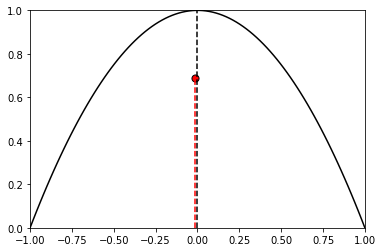

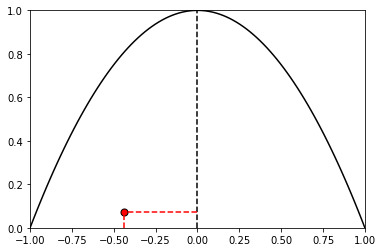

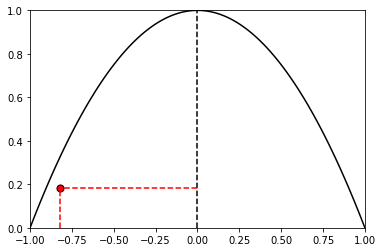

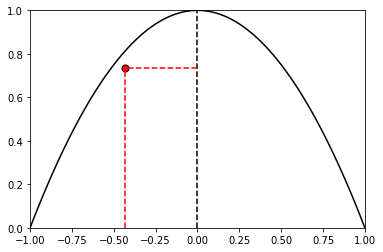

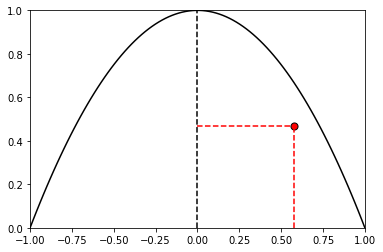

In [4]:


num_points=10
num_inside = 0
num_outside = 0
curve_area=0
rectangle_area=0
for i in range(num_points):
    x = 2.0*random.random()-1.0
    y = random.random()
    distances=np.sqrt(x**2+y**2) # not needed because we are not working with a cyrcle anymore

    g=1.0-x**2 # this is needed!
    rectangle=2
    curve=x-(pow(x,3)/3)

    if distances<=g: # one tiny change here and it will work
        num_inside=num_inside+1.0
    else:
        num_outside=num_outside+1.0

    if i<5:
        plt.figure()
        plt.scatter([x],[y], marker="o", c="r", s=50, edgecolor="k")
        xs = np.linspace(-1,1,100)
        ys = 1-xs**2.0
        plt.plot(xs, ys, "k-")
        plt.xlim([-1,1])
        plt.ylim([0,1])
        plt.plot([0,0], [0,1],"k--")
        plt.plot([0,x], [y,y],"r--")
        plt.plot([x,x], [0,y],"r--")
    #print(num_inside)
    #print(num_outside)
    ratio=num_inside/(num_inside+num_outside)
    #print(ratio)
    print("Iteration %i: inside: %i, outside: %i, ratio: %.3f"%(i, num_inside, num_outside, ratio))



In [ ]:

    # if y<=curve:

    #   curve_area=curve

    # else:

    #   curve_area=0

# area_ratio=curve_area/rectangle

# print(area_ratio)

 

# points_in=[]

# points_in=distances <= g

# points_out=distances > g

 

# area=points_out/points_in

 

# count_out = np.count_nonzero(distances>=1)

# # print(count_out)

# # count_in = np.count_nonzero(distances<1)

# # print(count_in)

# # ratio=count_in/len(distances)

# # print(ratio)

# # PI=ratio*4

# # print(PI)

 

# # points_in=[]

# # points_in=distances>1

# count_out = np.count_nonzero(distances>=1)

# print(count_out)

# count_in = np.count_nonzero(distances<1)

# print(count_in)

# ratio=count_in/len(distances)

# print(ratio)

# PI=ratio*4

# print(PI)

# # in_circle=(np.where(distances<1))

# # print(in_circle)

# # points_in.append(in_circle)